In [41]:
import matplotlib.pyplot as plt
from modules.zncc import compute_zncc_map
from modules.plot_spectrogram import plot_spectrogram
from modules.dataset import SpeechDataset
from modules.down_sample import downsample_to_8k
from modules.low_pass import apply_lowpass_filter
from modules.subsample import subsample

In [42]:
# noise_type = "0_air_conditioner"
noise_type = "white"
dataset = SpeechDataset(noise_type=noise_type)

itter = iter(dataset)

noisy, clean = next(itter)

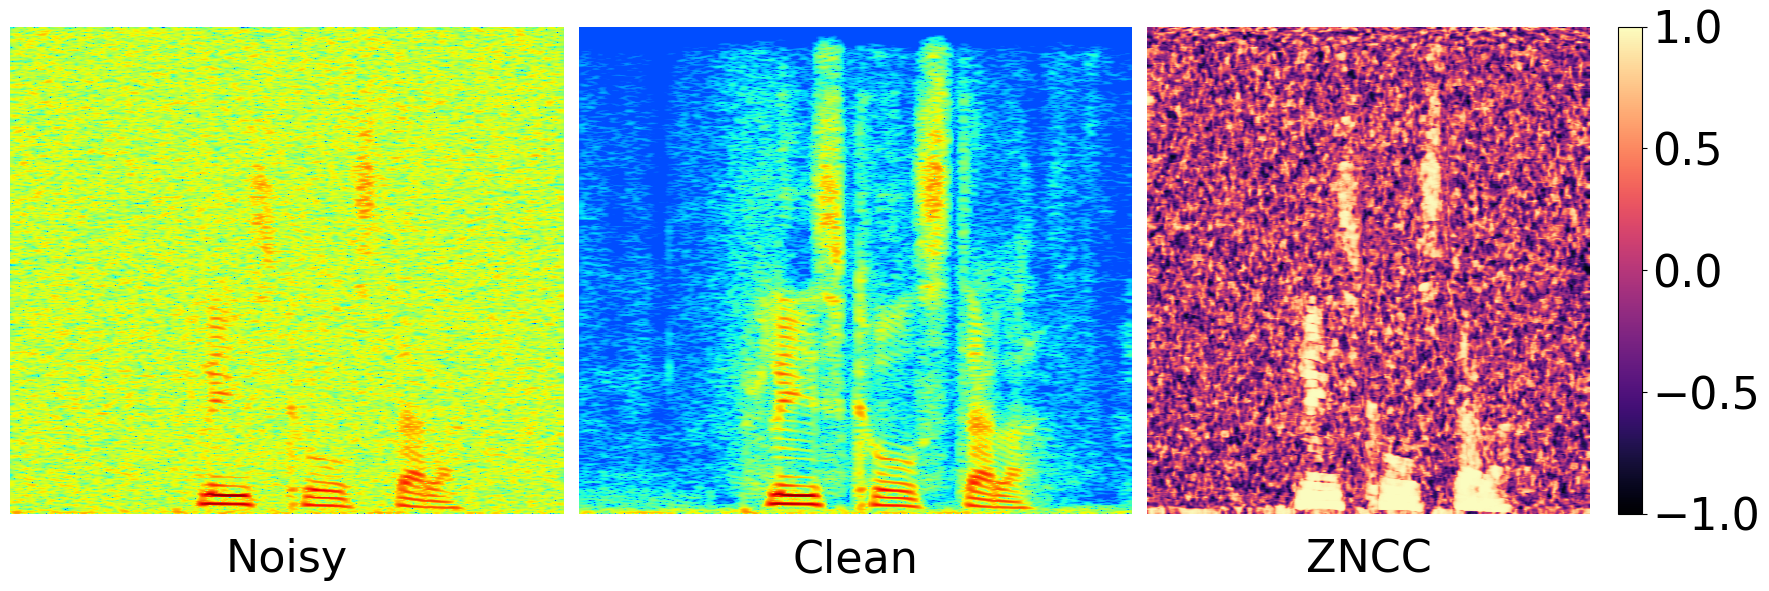

In [24]:
sample_rate = 16000

noisy2, clean2 = noisy.squeeze(0).numpy(), clean.squeeze(0).numpy()
zncc_map = compute_zncc_map(noisy2, clean2, sample_rate)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Plot the noisy spectrogram on the left
plot_spectrogram(axes[0], noisy2, sample_rate, title="Noisy")
# Plot the clean spectrogram in the center
plot_spectrogram(axes[1], clean2, sample_rate, title="Clean")
# Plot the ZNCC map on the right
im = axes[2].imshow(zncc_map, aspect="auto",origin="lower", cmap="magma", vmin=-1, vmax=1)
axes[2].axis("off")  # 軸を非表示に
axes[2].text(
    0.5,
    -0.05,
    "ZNCC",
    fontsize=32,
    ha="center",
    va="top",
    transform=axes[2].transAxes,
    bbox=dict(facecolor="white", alpha=0.7, edgecolor="none", pad=3),
)
# Optionally, add a colorbar for the ZNCC map
cbar = fig.colorbar(im, ax=axes[2], shrink=1)
cbar.ax.tick_params(labelsize=32)
plt.tight_layout()
plt.savefig("output2.pdf", format="pdf", bbox_inches="tight")
plt.show()
plt.close()

/Users/rockwell/Documents/python/SE-with-SubSampler/data_collection/modules/down_sample.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  wav = torch.tensor(wav)


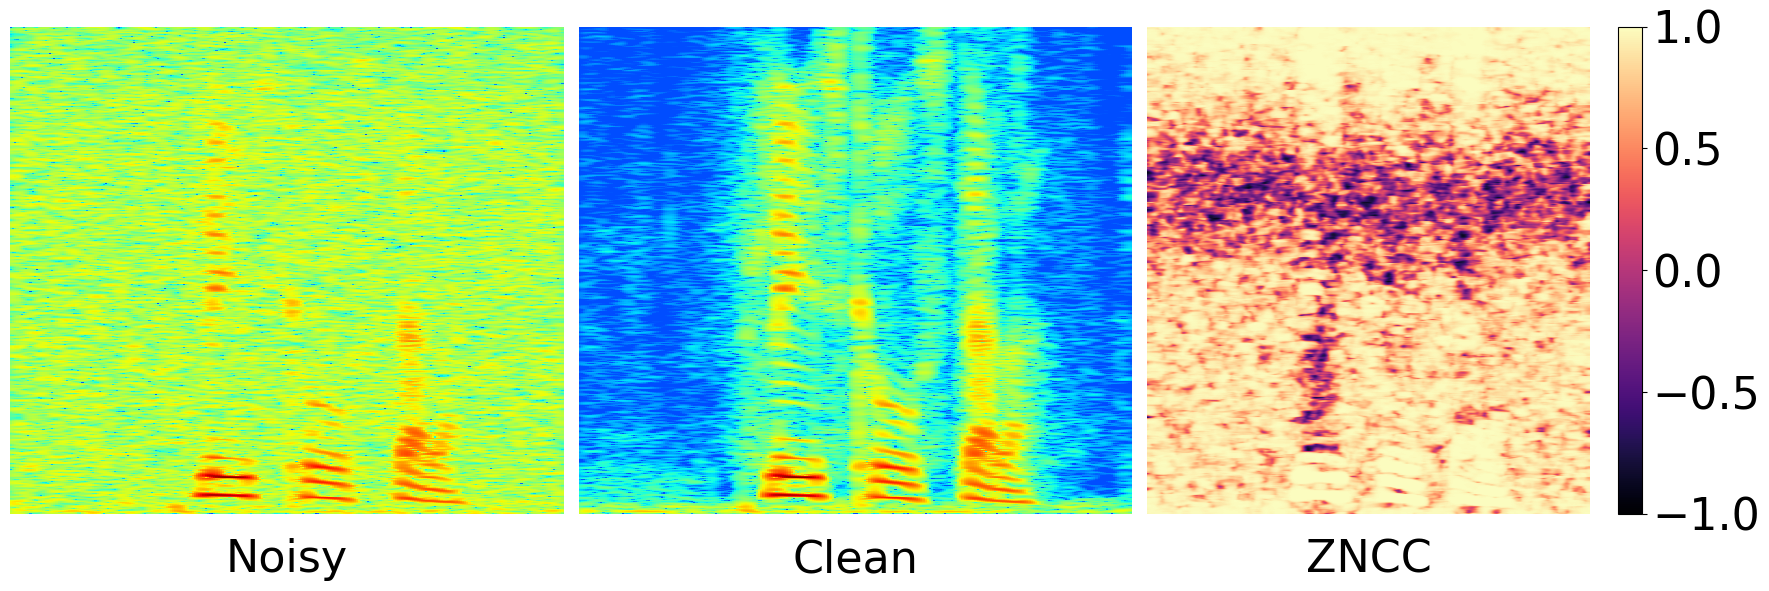

In [44]:
k = 2

noisy_applied_lowpass = apply_lowpass_filter(noisy)
g1, g2 = subsample(noisy_applied_lowpass, k)
g1 = g1.squeeze().detach().cpu().numpy()
g2 = g2.squeeze().detach().cpu().numpy()

zncc_map = compute_zncc_map(g1, g2, n_fft=1022, hop_length=32)  

noisy2 = downsample_to_8k(noisy, 16000).squeeze(0)
clean2 = downsample_to_8k(clean, 16000).squeeze(0)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Plot the noisy spectrogram on the left
plot_spectrogram(axes[0], noisy2, sample_rate, title="Noisy")
# Plot the clean spectrogram in the center
plot_spectrogram(axes[1], clean2, sample_rate, title="Clean")
# Plot the ZNCC map on the right
im = axes[2].imshow(zncc_map, aspect="auto", origin="lower", cmap="magma", vmin=-1, vmax=1)
axes[2].axis("off")  # 軸を非表示に
axes[2].text(
    0.5,
    -0.05,
    "ZNCC",
    fontsize=32,
    ha="center",
    va="top",
    transform=axes[2].transAxes,
    bbox=dict(facecolor="white", alpha=0.7, edgecolor="none", pad=3),
)
# Optionally, add a colorbar for the ZNCC map
cbar = fig.colorbar(im, ax=axes[2], shrink=1)
cbar.ax.tick_params(labelsize=32)
plt.tight_layout()
plt.savefig("output2.pdf", format="pdf", bbox_inches="tight")
plt.show()
plt.close()

In [45]:
def visualize_zncc_comparison(clean, noisy, zncc_maps, titles, figsize=(20, 7), font_size=32):
    """
    ZNCCマップを2x4グリッドで比較表示（右端にカラーバーを配置）
    """
    # 2行5列のGridSpecを作成（5列目はカラーバー用）
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(2, 5, width_ratios=[1,1,1,1,0.1])

    # スペクトログラムのプロット
    # 1行目1列目: clean
    ax_clean = fig.add_subplot(gs[0, 0])
    plot_spectrogram(ax_clean, clean, 8000, "noisy", font_size)

    # 2行目1列目: noisy
    ax_noisy = fig.add_subplot(gs[1, 0])
    plot_spectrogram(ax_noisy, noisy, 8000, "clean", font_size)

    # ZNCCマップのプロット
    k_titles = ["zncc(k=2)", "zncc(k=4)", "zncc(k=8)", "zncc(k=16)", "zncc(k=32)", "zncc(k=64)"]
    for idx, (zncc_map, title) in enumerate(zip(zncc_maps, k_titles)):
        row = idx // 3  # 0 or 1
        col = idx % 3 + 1  # 1,2,3 or 1,2,3

        ax = fig.add_subplot(gs[row, col])
        im = ax.imshow(zncc_map, origin="lower", aspect="auto", cmap="magma", vmin=-1, vmax=1)

        ax.text(
            0.5,
            -0.05,
            title,
            fontsize=font_size,
            ha="center",
            va="top",
            transform=ax.transAxes,
            bbox=dict(facecolor="white", alpha=0.7, edgecolor="none", pad=3),
        )
        ax.axis("off")

    # カラーバーの追加（右端の列）
    cbar_ax = fig.add_subplot(gs[:, 4])  # 全行の5列目
    cbar = fig.colorbar(im, cax=cbar_ax)
    cbar.ax.tick_params(labelsize=font_size)
    plt.tight_layout()
    plt.savefig("output2.pdf", format="pdf", bbox_inches="tight")
    plt.show()
    plt.close()


/Users/rockwell/Documents/python/SE-with-SubSampler/data_collection/modules/down_sample.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  wav = torch.tensor(wav)


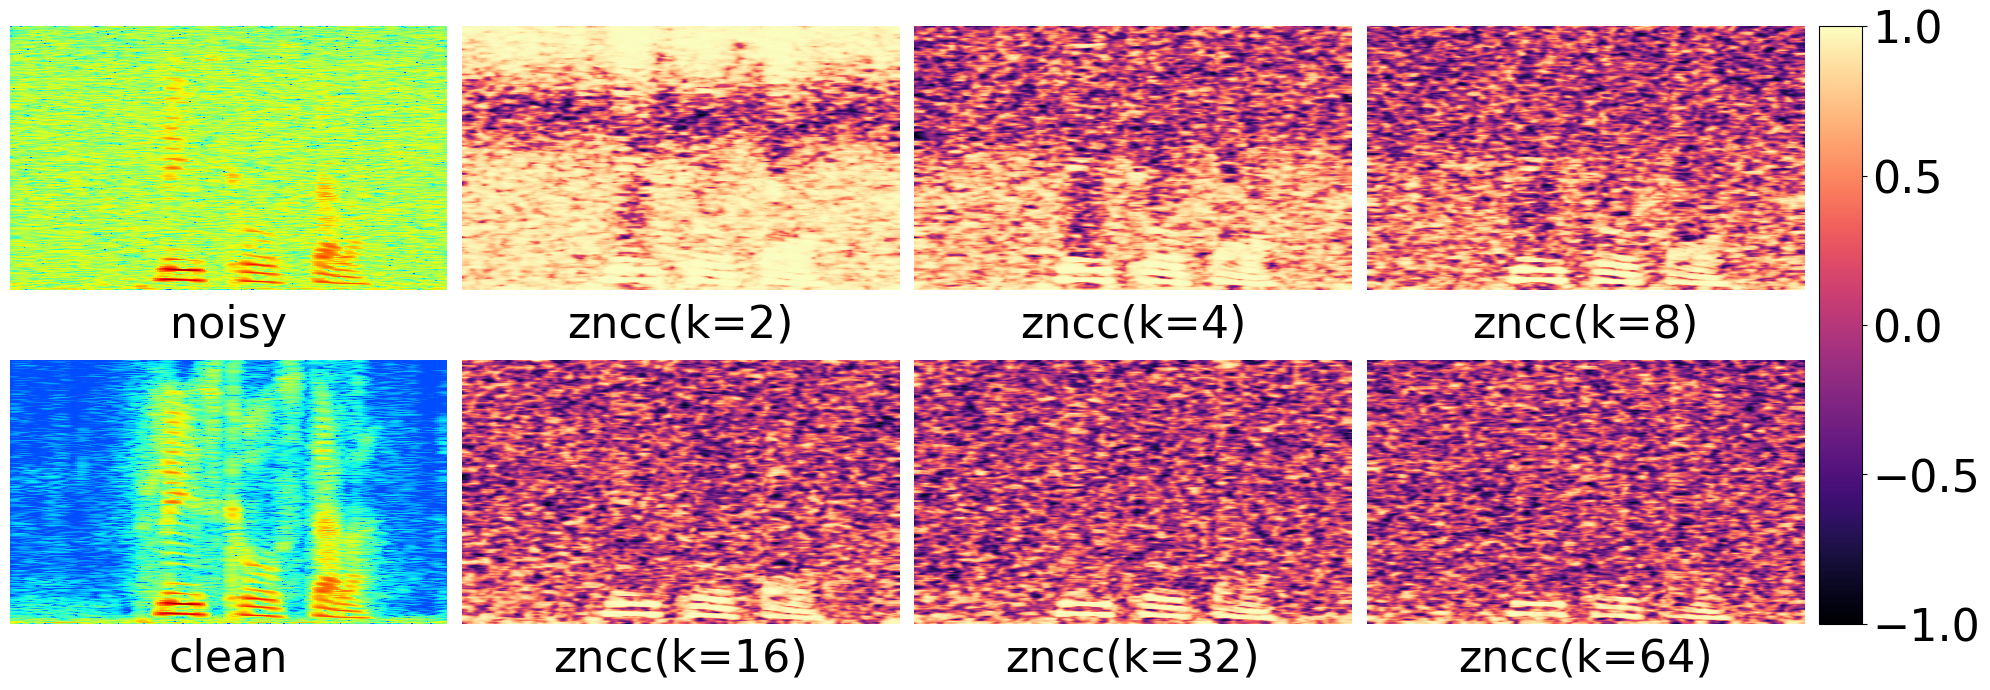

In [48]:
zncc_maps = []
titles = []
figsize=(20, 7)
font_size=32


noisy_applied_lowpass = apply_lowpass_filter(noisy)
for k in [2, 4, 8, 16, 32, 64]:
    g1, g2 = subsample(noisy_applied_lowpass, k)
    g1 = g1.squeeze().detach().cpu().numpy()
    g2 = g2.squeeze().detach().cpu().numpy()

    zncc_map = compute_zncc_map(g1, g2, n_fft=1022, hop_length=32)
    zncc_maps.append(zncc_map)
    titles.append(f"k={k}")

noisy2 = downsample_to_8k(noisy, 16000).squeeze(0)
clean2 = downsample_to_8k(clean, 16000).squeeze(0)


# 2行5列のGridSpecを作成（5列目はカラーバー用）
fig = plt.figure(figsize=figsize)
gs = fig.add_gridspec(2, 5, width_ratios=[1,1,1,1,0.1])
# スペクトログラムのプロット
# 1行目1列目: clean
ax_clean = fig.add_subplot(gs[0, 0])
plot_spectrogram(ax_clean, noisy2, 8000, "noisy", font_size)
# 2行目1列目: noisy
ax_noisy = fig.add_subplot(gs[1, 0])
plot_spectrogram(ax_noisy, clean2, 8000, "clean", font_size)
# ZNCCマップのプロット
k_titles = ["zncc(k=2)", "zncc(k=4)", "zncc(k=8)", "zncc(k=16)", "zncc(k=32)", "zncc(k=64)"]
for idx, (zncc_map, title) in enumerate(zip(zncc_maps, k_titles)):
    row = idx // 3  # 0 or 1
    col = idx % 3 + 1  # 1,2,3 or 1,2,3
    ax = fig.add_subplot(gs[row, col])
    im = ax.imshow(zncc_map, origin="lower", aspect="auto", cmap="magma", vmin=-1, vmax=1)
    ax.text(
        0.5,
        -0.05,
        title,
        fontsize=font_size,
        ha="center",
        va="top",
        transform=ax.transAxes,
        bbox=dict(facecolor="white", alpha=0.7, edgecolor="none", pad=3),
    )
    ax.axis("off")
# カラーバーの追加（右端の列）
cbar_ax = fig.add_subplot(gs[:, 4])  # 全行の5列目
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.tick_params(labelsize=font_size)
plt.tight_layout()
plt.savefig("output2.pdf", format="pdf", bbox_inches="tight")
plt.show()
plt.close()